In [22]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime

%matplotlib inline

In [23]:
plt.style.use('ggplot')  # Красивые графики
plt.rcParams['figure.figsize'] = (20, 15)  # Размер картинок

In [24]:
path = os.chdir(r'C:\Users\AmanovRA\Anaconda3\Work-work\Bloggers_analysis\Bloggers30042020')

files = os.listdir(path)

files_xlsx = [f for f in files if f[-6:] == '1.xlsx']
files_xlsx2 = [f for f in files if f[-6:] == '2.xlsx']

df = pd.DataFrame()
df2 = pd.DataFrame()

for f in files_xlsx:
    data = pd.read_excel(f)
    name = f[:-6]
    data['name'] = name
    df = df.append(data)
    
for f in files_xlsx2:
    data = pd.read_excel(f, header=1)
    name = f[:-6]
    data['name'] = name    
    df2 = df2.append(data.iloc[:1, :])    

In [25]:
df.Author = df.Author.apply(str)

In [26]:
df = df.merge(df2, how='left', left_on='name', right_on='name')

In [27]:
df = df.loc[:, [i for i in df.columns if  not i[-1].isdigit()]]
df.drop('Период', axis = 1, inplace = True)

In [28]:
df['Period'] = df.Date.apply(lambda x: x <= pd.datetime(2020, 3, 15)).apply(lambda y: 'До пандемии' if y else 'Во время пандемии')

C:\Users\AmanovRA\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  """Entry point for launching an IPython kernel.


In [29]:
df = df[df['Date'] >= pd.datetime(2019, 7, 1)]

C:\Users\AmanovRA\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  """Entry point for launching an IPython kernel.


In [30]:
df = df.sort_values('Date')
df = df.reset_index(drop=True)

In [31]:
df['Month'] = pd.DatetimeIndex(df['Date']).month
df['Year'] = pd.DatetimeIndex(df['Date']).year

In [32]:
group_blogers = df.groupby(['name', 'Year', 'Month']).mean().loc[:,['Likes', 'Comments', 'ER']]

NameError: name 'ax' is not defined

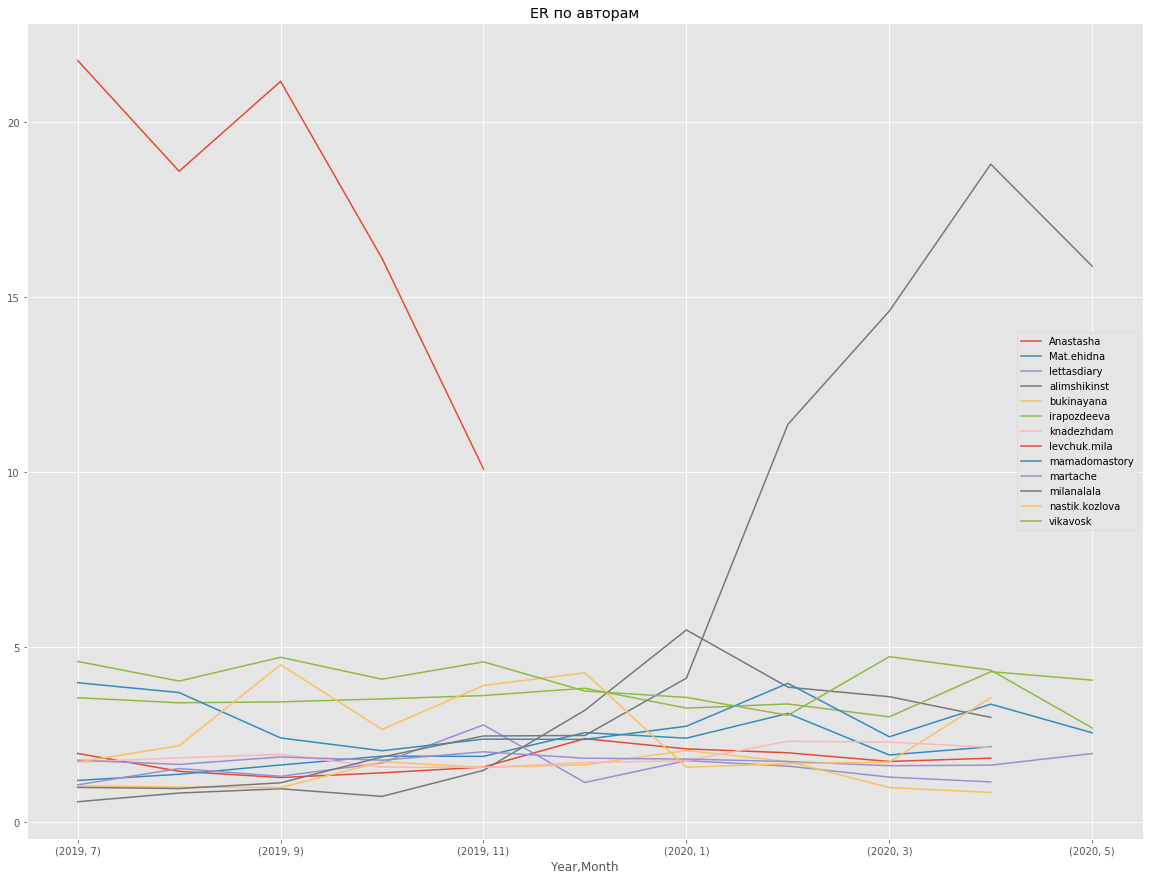

In [33]:
set_names = sorted(set(df.name))
for name in set_names:
    data = group_blogers.loc[name, :]['ER']
    #group_blogers.ER.loc[name, :].plot(title='ER по авторам', label=name, legend=True)    Чтобы убрать подписи с именами
    data.plot(title='ER по авторам', label=name.replace('_', ''), legend=True)

ax.set_xlabel('Год, месяц')
ax.set_ylabel('ER')    
    



In [34]:
group_blogers.loc['milana_lala_'].to_excel('milana_lala.xlsx')

In [ ]:
df.groupby('name').agg({'Likes' : 'mean', 'Comments' : 'mean', 'ER' : 'mean'}).to_excel('блогеры_средние_показатели.xlsx')

In [39]:
df['Подписчиков'] = df['Подписчиков'].apply(int)

In [40]:
df['Подписчиков'].dtypes

dtype('int64')

In [41]:
def group_folowers(x):
    if 0 <= x <= 20000:
        return 'подписчиков от 1000-20000'
    elif 20001 <= x <= 50000:
        return 'от 20001-50000'
    elif 50001 <= x <= 100000:
        return 'от 50001-100000'
    else:
        return 'свыше 100000'

In [42]:
df['По_подписчикам'] = df['Подписчиков'].apply(group_folowers)

In [45]:
group_blogers = df.groupby(['По_подписчикам', 'name', 'Year', 'Month']).mean().loc[:,['Likes', 'Comments', 'ER']]

In [50]:
for i in group_blogers:
    print(i)

Likes
Comments
ER


In [82]:
group1 = df[df['По_подписчикам']=='свыше 100000'].groupby(['name', 'Year', 'Month']).mean().loc[:,['Likes', 'Comments', 'ER']]
group2 = df[df['По_подписчикам']=='от 50001-100000'].groupby(['name', 'Year', 'Month']).mean().loc[:,['Likes', 'Comments', 'ER']]
group3 = df[df['По_подписчикам']=='подписчиков от 1000-20000'].groupby(['name', 'Year', 'Month']).mean().loc[:,['Likes', 'Comments', 'ER']]

NameError: name 'ax' is not defined

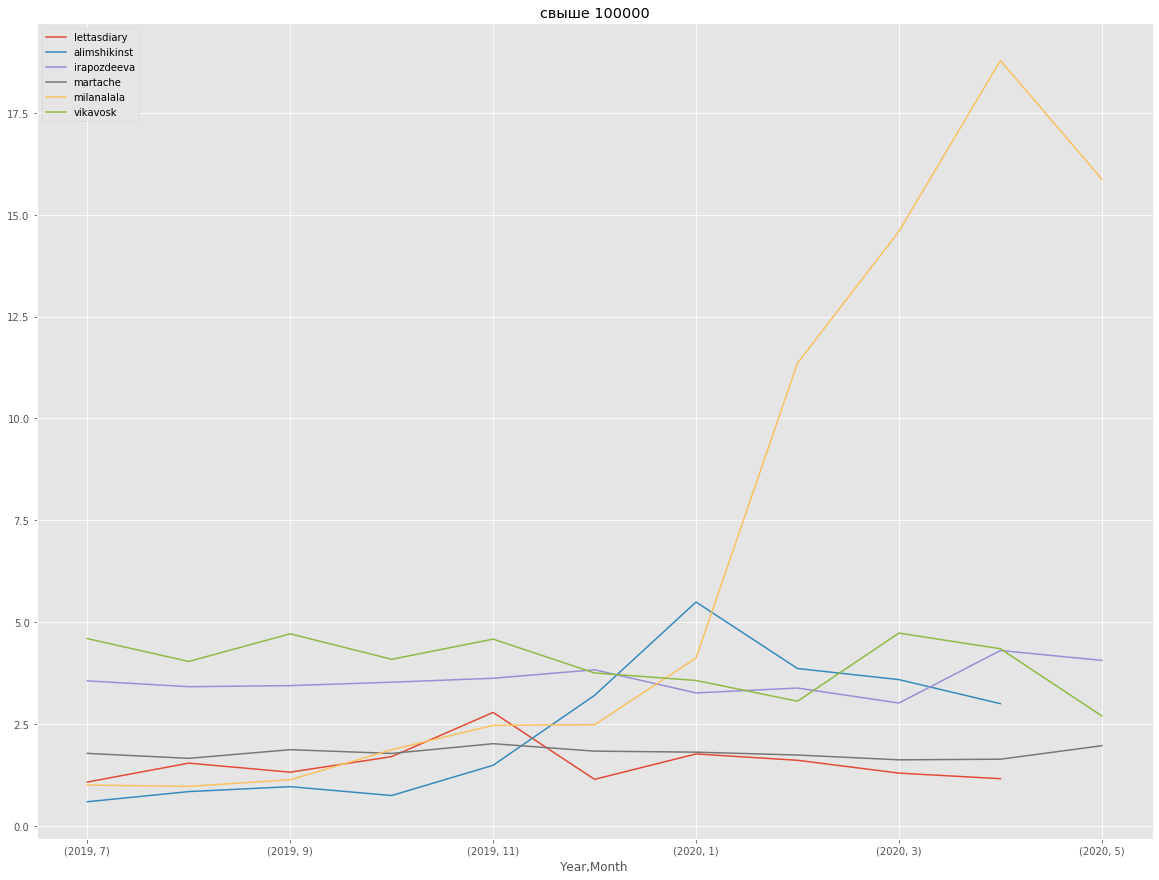

In [83]:
set_names = sorted(set(df[df['По_подписчикам']=='свыше 100000'].name))
for name in set_names:
    data = group1.loc[name, :]['ER']
    #group_blogers.ER.loc[name, :].plot(title='ER по авторам', label=name, legend=True)    Чтобы убрать подписи с именами
    data.plot(title='свыше 100000', label=name.replace('_', ''), legend=True)

ax.set_xlabel('Год, месяц')
ax.set_ylabel('ER') 

NameError: name 'ax' is not defined

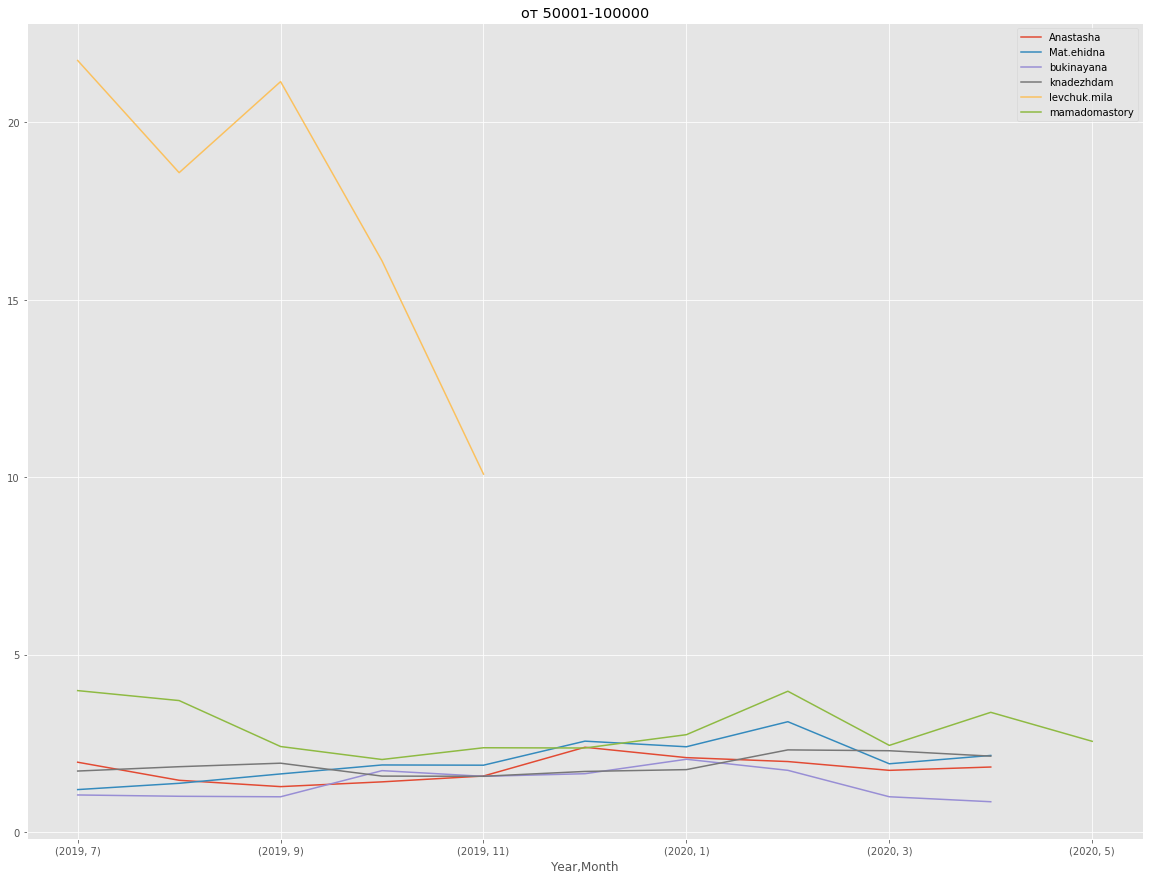

In [84]:
set_names = sorted(set(df[df['По_подписчикам']=='от 50001-100000'].name))
for name in set_names:
    data = group2.loc[name, :]['ER']
    #group_blogers.ER.loc[name, :].plot(title='ER по авторам', label=name, legend=True)    Чтобы убрать подписи с именами
    data.plot(title='от 50001-100000', label=name.replace('_', ''), legend=True)

ax.set_xlabel('Год, месяц')
ax.set_ylabel('ER') 

NameError: name 'ax' is not defined

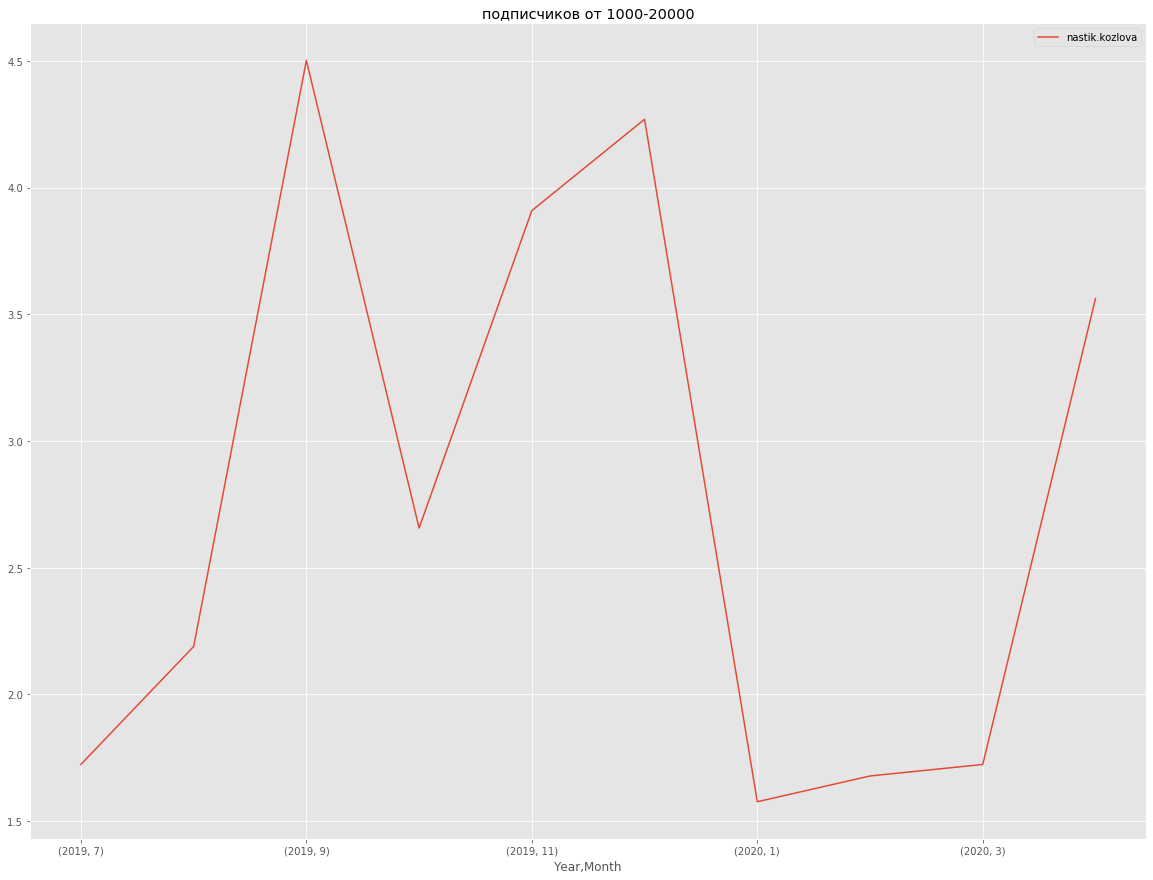

In [85]:
set_names = sorted(set(df[df['По_подписчикам']=='подписчиков от 1000-20000'].name))
for name in set_names:
    data = group3.loc[name, :]['ER']
    #group_blogers.ER.loc[name, :].plot(title='ER по авторам', label=name, legend=True)    Чтобы убрать подписи с именами
    data.plot(title='подписчиков от 1000-20000', label=name.replace('_', ''), legend=True)

ax.set_xlabel('Год, месяц')
ax.set_ylabel('ER') 

In [68]:
set_names

['_lettasdiary_',
 'alimshikinst_',
 'irapozdeeva_',
 'marta_che_',
 'milana_lala_',
 'vikavosk_']

In [74]:
df[df['По_подписчикам']=='свыше 100000'].name.unique()

array(['irapozdeeva_', 'marta_che_', 'alimshikinst_', '_lettasdiary_',
       'milana_lala_', 'vikavosk_'], dtype=object)